<a href="https://colab.research.google.com/github/AsmaaAlghamd1/Asmaa_INFO5731_-Spring2021/blob/main/In_Class_exercises_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# In class exercise 10 (20 points in total, 4/16/2021)

The purpose of the exercise is to practice different machine learning algorithms for text clustering
Please downlad the dataset by using the following link.  https://www.kaggle.com/PromptCloudHQ/amazon-reviews-unlocked-mobile-phones
(You can also use different text data which you want)

Apply the listed clustering methods to the dataset:

K means, 
DBSCAN,
Hierarchical clustering. 

You can refer to of the codes from  the follwing link below. 
https://www.kaggle.com/karthik3890/text-clustering 
    

In [1]:
#importing necessary libraries
import pandas as pd
import nltk
from nltk.corpus import stopwords

from textblob import Word
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
nltk.download('wordnet')
from sklearn.cluster import KMeans
import numpy as np 
import matplotlib.pyplot as plt
from sklearn import metrics
import gensim
import scipy
from scipy.cluster import hierarchy
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets.samples_generator import (make_blobs,
                                                make_circles,
                                                make_moons)
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


In [3]:
#load the data
myfile=pd.read_csv("/content/Amazon_Unlocked_Mobile.csv")

df = myfile.head(20000)
df

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.0
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,Very pleased,0.0
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,It works good but it goes slow sometimes but i...,0.0
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,Great phone to replace my lost phone. The only...,0.0
...,...,...,...,...,...,...
19995,Apple iPhone 5 16GB Verizon Wireless CDMA 4G L...,Apple,239.95,2,had some technical issues,1.0
19996,Apple iPhone 5 16GB Verizon Wireless CDMA 4G L...,Apple,239.95,5,Works very well. Shipped very quickly and is s...,0.0
19997,Apple iPhone 5 16GB Verizon Wireless CDMA 4G L...,Apple,239.95,5,Phone looked brand new. I've had it one month ...,0.0
19998,Apple iPhone 5 16GB Verizon Wireless CDMA 4G L...,Apple,239.95,2,Doesn't hold a charge and dies at 25%,1.0


In [4]:
print(df.shape)



(20000, 6)


In [6]:
Amdata = df.dropna()
Amdata.shape

(12962, 6)

In [7]:
def review_classification(rating):
    if rating < 3:
        return 'Negative'
    return 'Positive'

rating_classification = Amdata['Rating'].map(review_classification) 
Amdata['Rating'] = rating_classification

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


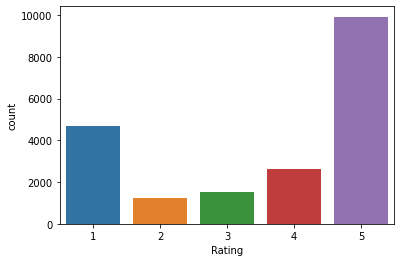

In [8]:
import seaborn as sns
sns.countplot(df.Rating)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


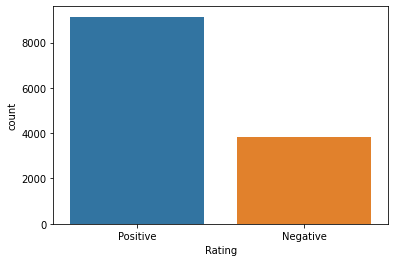

In [9]:
import seaborn as sns
sns.countplot(Amdata.Rating)



In [10]:
Amdata['Rating'].value_counts()


Positive    9138
Negative    3824
Name: Rating, dtype: int64

In [11]:
import re
x = 0;
for y in Amdata['Reviews'].values:
    if (len(re.findall('<.*?>', y))):
        print(x)
        print(y)
        break;
    x += 1;

3205
Unless you know how to jail break this phone... what's the point? Most apps don't support this old phone. <(it's not really old, they just want you to spend money on the newer version. wtf? but whatever)>


In [12]:
def cleanhtml(sentence):
    Org = re.compile('<.*?>')
    cleantext = re.sub(Org, ' ', sentence)
    return cleantext

In [14]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')
Amdata['Cleaned Text'] = Amdata['Reviews'].apply(lambda x: " ".join(x.lower() for x in x.split()))
Amdata['Cleaned Text'] = Amdata['Cleaned Text'].apply(lambda x: cleanhtml(x))
Amdata['Cleaned Text'] = Amdata['Cleaned Text'].apply(lambda x: ''.join(re.sub(r"[^a-zA-Z0-9]+", ' ', charctr) for charctr in x ))
Amdata['Cleaned Text'] = Amdata['Cleaned Text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pan

In [15]:

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans
CountVec = CountVectorizer()
Data1 = CountVec.fit_transform(Amdata['Cleaned Text'].values)
Names = CountVec.get_feature_names()
model = KMeans(n_clusters = 10, init='k-means++', n_jobs = -1, random_state=99)
model.fit(Data1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=10, n_jobs=-1, precompute_distances='auto',
       random_state=99, tol=0.0001, verbose=0)

In [17]:
Vectorizer = TfidfVectorizer()
tfidf_vect = Vectorizer.fit_transform(Amdata['Cleaned Text'].values)
Fnames= Vectorizer.get_feature_names()

In [18]:
labels = model.labels_
cc = model.cluster_centers_
cc

array([[0.00227015, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.02882096, 0.00087336, 0.00087336, ..., 0.        , 0.00087336,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.16666667, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.02289157, 0.00120482, 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [19]:

from sklearn import metrics
silhouette_score = metrics.silhouette_score(Data1, labels, metric='euclidean')
silhouette_score

0.03749979328311352

In [20]:
Amdata['Bow Clus Label'] = model.labels_
Amdata.groupby(['Bow Clus Label'])['Reviews'].count()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Bow Clus Label
0    6167
1    1145
2       1
3      57
4     215
5    4479
6      49
7      18
8       1
9     830
Name: Reviews, dtype: int64

In [21]:
print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = CountVec.get_feature_names()
for i in range(10):
    print("Cluster %d:" % i, end='')
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind], end='')
        print()

Top terms per cluster:
Cluster 0: good
 great
 works
 product
 iphone
 new
 work
 like
 battery
 condition
Cluster 1: phone
 new
 would
 great
 screen
 one
 good
 get
 like
 iphone
Cluster 2: battery
 back
 would
 issue
 alcatel
 real
 less
 get
 troubleshooting
 save
Cluster 3: phone
 screen
 really
 use
 like
 good
 great
 battery
 sim
 one
Cluster 4: phone
 good
 screen
 one
 use
 would
 great
 like
 battery
 new
Cluster 5: phone
 great
 good
 new
 works
 work
 like
 one
 would
 condition
Cluster 6: phone
 screen
 one
 good
 like
 camera
 battery
 get
 better
 use
Cluster 7: phone
 like
 camera
 one
 screen
 good
 get
 phones
 would
 use
Cluster 8: phone
 tracfone
 data
 time
 wifi
 use
 android
 hard
 alcatel
 minutes
Cluster 9: iphone
 phone
 new
 one
 like
 apple
 great
 good
 4s
 would


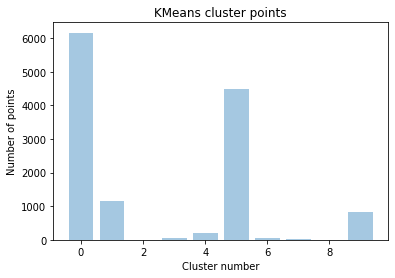

In [22]:
import matplotlib.pyplot as plt
plt.bar([x for x in range(10)],Amdata.groupby(['Bow Clus Label'])['Reviews'].count(), alpha = 0.4)
plt.title('KMeans cluster points')
plt.xlabel("Cluster number")
plt.ylabel("Number of points")
plt.show()

In [23]:
list_of_sentences = []
for sentence in Amdata['Cleaned Text'].values:
    list_of_sentences.append(sentence.split())

In [24]:


wTOv_model=gensim.models.Word2Vec(list_of_sentences,size=100, workers=4)

Allsent = []
for s in list_of_sentences:
  v = np.zeros(100)
  word_count = 0
  for word in s:
    try:
      vec = wTOv_model.wv[word]
      v += vec
      word_count += 1
    except:
      pass
  v /= word_count
  Allsent.append(v)
Allsent = np.array(Allsent)
Allsent = np.nan_to_num(Allsent)
Allsent.shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in true_divide
  app.launch_new_instance()


(12962, 100)

In [25]:

Clusters_Num = [x for x in range(3,11)]
Clusters_Num

[3, 4, 5, 6, 7, 8, 9, 10]

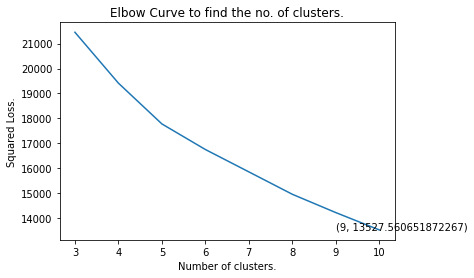

The optimal number of clusters obtained is -  9
The loss for optimal cluster is -  13527.560651872267


In [26]:

squared_errors = []
for cluster in Clusters_Num:
    kmeans = KMeans(n_clusters = cluster).fit(Allsent)
    squared_errors.append(kmeans.inertia_)
    
optimal_clusters = np.argmin(squared_errors) + 2 
plt.plot(Clusters_Num, squared_errors)
plt.title("Elbow Curve to find the no. of clusters.")
plt.xlabel("Number of clusters.")
plt.ylabel("Squared Loss.")
xy = (optimal_clusters, min(squared_errors))
plt.annotate('(%s, %s)' % xy, xy = xy, textcoords='data')
plt.show()
print ("The optimal number of clusters obtained is - ", optimal_clusters)
print ("The loss for optimal cluster is - ", min(squared_errors))

In [27]:

SecModel = KMeans(n_clusters = optimal_clusters)
SecModel.fit(Allsent)


word_cluster_pred = SecModel.predict(Allsent)
word_cluster_pred_2 = SecModel.labels_
word_cluster_center = SecModel.cluster_centers_
word_cluster_center[1:2]

array([[-0.07291256,  0.20407118, -0.06298015, -0.04745311,  0.16980546,
         0.46220962,  0.08566559,  0.02156086, -0.05196257,  0.04364978,
        -0.34787478, -0.11897375,  0.30657233, -0.09834409,  0.1708925 ,
         0.35203925, -0.28620908,  0.2053027 ,  0.03396045, -0.05490954,
        -0.24438121,  0.14492376,  0.30427804,  0.38778345,  0.08570869,
        -0.13587769,  0.24381615, -0.01837068, -0.14322715,  0.00438753,
        -0.3593242 , -0.08747756, -0.27066588,  0.00446459, -0.18714896,
        -0.02069094,  0.06693118, -0.03844426,  0.17771047,  0.12761256,
         0.13395188, -0.06927132,  0.36912886, -0.04868005,  0.0644616 ,
        -0.41104229,  0.11971524,  0.43789137,  0.16834748, -0.19089488,
        -0.16390546,  0.26320984, -0.11543217,  0.28594594,  0.15613359,
        -0.19812527,  0.41591009, -0.33406738,  0.4190387 ,  0.21750273,
        -0.07199634, -0.09777833, -0.03400046,  0.40166891,  0.09009817,
         0.09886981, -0.20432955,  0.40609235, -0.2

In [28]:
for i in range(10):
    print("A review of assigned to cluster ", i)
    print("-" * 70)
    print(Amdata.iloc[Amdata.groupby(['Bow Clus Label']).groups[i][0]]['Reviews'])
    print('\n')
    print("_" * 70)

A review of assigned to cluster  0
----------------------------------------------------------------------
Very pleased


______________________________________________________________________
A review of assigned to cluster  1
----------------------------------------------------------------------
I feel so LUCKY to have found this used (phone to us & not used hard at all), phone on line from someone who upgraded and sold this one. My Son liked his old one that finally fell apart after 2.5+ years and didn't want an upgrade!! Thank you Seller, we really appreciate it & your honesty re: said used phone.I recommend this seller very highly & would but from them again!!


______________________________________________________________________
A review of assigned to cluster  2
----------------------------------------------------------------------
Great phones, great price. what more can I say


______________________________________________________________________
A review of assigned to clus

In [29]:
dfa = Amdata
dfa['AVG-W2V Clus Label'] = SecModel.labels_
dfa.head(2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Product Name,Brand Name,Price,Rating,Reviews,Review Votes,Cleaned Text,Bow Clus Label,AVG-W2V Clus Label
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,Positive,I feel so LUCKY to have found this used (phone...,1.0,feel lucky found used phone us used hard phone...,1,5
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,Positive,"nice phone, nice up grade from my pantach revu...",0.0,nice phone nice grade pantach revue clean set ...,1,3


In [30]:
dfa.groupby(['AVG-W2V Clus Label'])['Reviews'].count()

AVG-W2V Clus Label
0     807
1    3583
2    1002
3    2411
4     916
5    1749
6    1381
7     458
8     655
Name: Reviews, dtype: int64

In [31]:
for i in range(optimal_clusters):
    print("A review of assigned to cluster ", i)
    print("-" * 70)
    print(dfa.iloc[dfa.groupby(['AVG-W2V Clus Label']).groups[i][0]]['Reviews'])
    print('\n')
    print(dfa.iloc[dfa.groupby(['AVG-W2V Clus Label']).groups[i][1]]['Reviews'])
    print('\n')
    print("_" * 70)

A review of assigned to cluster  0
----------------------------------------------------------------------
as described, fast ship!


excellent product in perfect condition


______________________________________________________________________
A review of assigned to cluster  1
----------------------------------------------------------------------
Great phone to replace my lost phone. The only thing is the volume up button does not work, but I can still go into settings to adjust. Other than that, it does the job until I am eligible to upgrade my phone again.Thaanks!


I already had a phone with problems... I know it stated it was used, but dang, it did not state that it did not charge. I wish I would have read these comments then I would have not purchased this item.... and its cracked on the side.. damaged goods is what it is.... If trying to charge it another way does not work I am requesting for my money back... AND I WILL GET MY MONEY BACK...SIGNED AN UNHAPPY CUSTOMER....


_____

# DBSCAN

In [33]:
from sklearn.cluster import DBSCAN

minPts = 2 * 100
def lower_bound(nums, target): 
    l, r = 0, len(nums) - 1
    while l <= r: 
        mid = int(l + (r - l) / 2)
        if nums[mid] >= target:
            r = mid - 1
        else:
            l = mid + 1
    return l

def compute200thnearestneighbour(x, data):
    dists = []
    for val in data:
        dist = np.sum((x - val) **2 ) 
        if(len(dists) == 200 and dists[199] > dist): 
            l = int(lower_bound(dists, dist)) 
            if l < 200 and l >= 0 and dists[l] > dist:
                dists[l] = dist
        else:
            dists.append(dist)
            dists.sort()
    
    return dists[199]

In [34]:
twohundrethneigh = []
for val in Allsent[:1500]:
    twohundrethneigh.append( compute200thnearestneighbour(val, Allsent[:1500]) )
twohundrethneigh.sort()

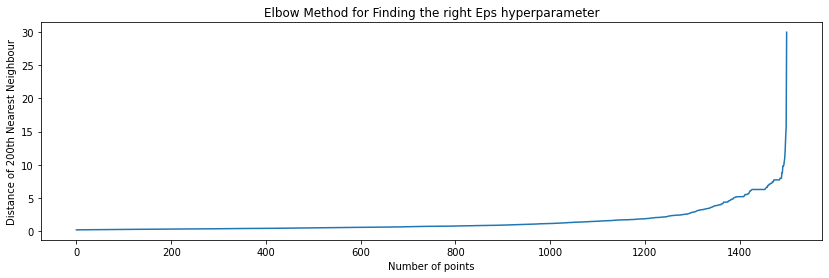

In [35]:
plt.figure(figsize=(14,4))
plt.title("Elbow Method for Finding the right Eps hyperparameter")
plt.plot([x for x in range(len(twohundrethneigh))], twohundrethneigh)
plt.xlabel("Number of points")
plt.ylabel("Distance of 200th Nearest Neighbour")
plt.show()

In [43]:
model = DBSCAN(eps = 5, min_samples = minPts, n_jobs=-1)
model.fit(Allsent)

DBSCAN(algorithm='auto', eps=5, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=200, n_jobs=-1, p=None)

# Hierarchial clustering

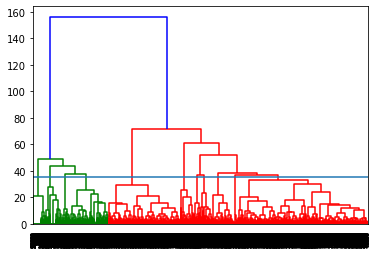

In [37]:
import scipy
from scipy.cluster import hierarchy
Dendro=hierarchy.dendrogram(hierarchy.linkage(Allsent,method='ward'))
plt.axhline(y=35)

In [38]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')  
ClusPred=cluster.fit_predict(Allsent)

CLd = dfa
CLd['AVG-W2V Clus Label'] = cluster.labels_
CLd.head(2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,Product Name,Brand Name,Price,Rating,Reviews,Review Votes,Cleaned Text,Bow Clus Label,AVG-W2V Clus Label
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,Positive,I feel so LUCKY to have found this used (phone...,1.0,feel lucky found used phone us used hard phone...,1,2
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,Positive,"nice phone, nice up grade from my pantach revu...",0.0,nice phone nice grade pantach revue clean set ...,1,1


In [39]:
CLd.groupby(['AVG-W2V Clus Label'])['Reviews'].count()

AVG-W2V Clus Label
0    2927
1    6016
2    2782
3     511
4     726
Name: Reviews, dtype: int64

In [42]:
for i in range(5):
    print("2 reviews of assigned to cluster ", i)
    print("-" * 70)
    print(CLd.iloc[CLd.groupby(['AVG-W2V Clus Label']).groups[i][0]]['Reviews'])
    print('\n')
    print(CLd.iloc[CLd.groupby(['AVG-W2V Clus Label']).groups[i][1]]['Reviews'])
    print('\n')
    print("_" * 70)

2 reviews of assigned to cluster  0
----------------------------------------------------------------------
Very pleased


the phone was great and in good condition. My Daughter is so happy the be a andriod user now !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!


______________________________________________________________________
2 reviews of assigned to cluster  1
----------------------------------------------------------------------
nice phone, nice up grade from my pantach revue. Very clean set up and easy set up. never had an android phone but they are fantastic to say the least. perfect size for surfing and social media. great phone samsung


Great phone to replace my lost phone. The only thing is the volume up button does not work, but I can still go into settings to adjust. Other than that, it does the job until I am eligible to upgrade my phone again.Thaanks!


______________________________________________________________________
2 reviews of assigned to cluster  2
-----------------------

K means, DBSCAN, and Hierarchical clustering are the most popular clustering algorithms in machine learning. I found that  K Means clustering can handle big data, but it takes a long time to execute the operations. In general, the results of  K Means are better than  DBSCAN and Hierarchical clustering in grouping the data. If we can make a list of the best  performance for all of the algorithms, Hierarchical clustering comes in the second position after the KMeans, and the last position is for DBSCAN 